<a href="https://colab.research.google.com/github/vidhipitroda/Resnet--50/blob/master/Resnet_50_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing all the libraries and downloading dataset
import tensorflow.compat.v1 as tf
from keras.datasets import cifar100
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import tensorflow.keras as keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, UpSampling2D, Flatten, BatchNormalization, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers
from keras.datasets import cifar100
import tensorflow as tf
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import time
from skimage.transform import resize
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

Using TensorFlow backend.


169009152/169001437 [==============================] - 2s 0us/step


Installing keras-resnet

In [0]:
pip install keras-resnet

  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20487 sha256=a648b1f1a14d3f56535264542c0f9b958111f7d1ae7bbc6b1de892626bb241ac
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-resnet


Checking the shapes of dataset

In [0]:
print("shape of x_train",x_train.shape)
print("shape of y_train",y_train.shape)
print("shape of x_test",x_test.shape)
print("shape of y_test",y_test.shape)


shape of x_train (50000, 32, 32, 3)
shape of y_train (50000, 1)
shape of x_test (10000, 32, 32, 3)
shape of y_test (10000, 1)


**Dataset printing**

In [0]:
#x_train[0][0]

 **Data preprocessing**

In [0]:
num_classes = 100
#nb_epochs = 10

#performing one hot encoding on labels

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

#perform preprocessing on input data

x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)






In [0]:
#image data augmentation is performed to improve the ability
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=False,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)


**Defining the model and add fully connected layers at the end**

In [0]:
#defining the model
resnet_model = ResNet50(weights= 'imagenet' , include_top=False, input_shape=(32, 32, 3), classes=100)


for layer in resnet_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False
#adding fully connected layers 


model = Sequential()
model.add(UpSampling2D())
#model.add(UpSampling2D())
#model.add(UpSampling2D())
#model.add(BatchNormalization())
model.add(resnet_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(521, activation='relu'))
model.add(Dropout(.10))
#model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
94773248/94765736 [==============================] - 1s 0us/step


**Compiling the model**

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


 **Running the model**

In [0]:

history_callback = model.fit(x_train,y_train,batch_size=35,epochs=20,verbose=1,validation_data = (x_test, y_test))
loss_history = history_callback.history["loss"]

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
  455/50000 [..............................] - ETA: 2:06:00 - loss: 5.2008 - acc: 0.0418

**Printing model summary**

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d_3 (UpSampling2 multiple                  0         
_________________________________________________________________
up_sampling2d_4 (UpSampling2 multiple                  0         
_________________________________________________________________
up_sampling2d_5 (UpSampling2 multiple                  0         
_________________________________________________________________
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  1067529   
_________________________________________________________________
dropout_1 (Dropout)          multiple                 

In [0]:
t=time.time()
print('Training time: %s' % (t - time.time()))

Training time: -8.320808410644531e-05


**Testing the model**

In [0]:
scores = model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 15s 2ms/sample - loss: 1.8633 - acc: 0.6405


In [0]:
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 1.863293790626526
Test accuracy: 0.6405


**Printing the loss history**

In [0]:
import h5py
import numpy
numpy_loss_history = numpy.array(loss_history)
numpy.savetxt("loss_history.txt", numpy_loss_history, delimiter=",")

**Printing the accuracy**

In [0]:
accuracy = history_callback.history["acc"]
numpy_loss_history = numpy.array(accuracy)
numpy.savetxt("acc.txt", numpy_loss_history, delimiter=",")

**Saving the model**

In [0]:
model_json = model.to_json()
with open("model_pretained.json", "w") as json_file:
    json_file.write(model_json)

**Saving the weights in file**

In [0]:
#save weights
model.save_weights('my_model_weights.h5')

**Printing history of all parameters**

In [0]:
print(history_callback.history.keys())
print("Loss history",history_callback.history['loss'])
print('Accuracy for every epoch',history_callback.history['acc'])
#print("Validation loss", history_callback.history['val_loss'])
#print('Validation accuracy',history_callback.history['val_acc'])

dict_keys(['loss', 'acc'])
Loss history [2.1968058902204035, 1.4582945993185044, 1.2127111115157605, 1.0214670684158802, 0.8806990990817547, 0.7555160779818892, 0.657923465615511, 0.5654082992337645, 0.5100806192442775, 0.4503755242500454]
Accuracy for every epoch [0.44162, 0.59146, 0.64882, 0.69522, 0.73376, 0.76776, 0.79568, 0.8208, 0.83884, 0.85614]


**Plotting the graph of model accuracy**

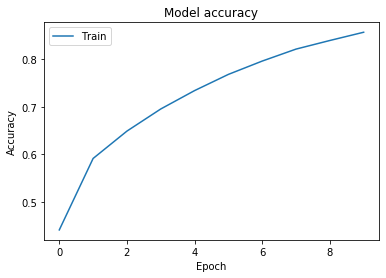

In [0]:
import matplotlib.pyplot as plt

#history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history_callback.history['acc'])
#plt.plot(history_callback.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



**Plotting the graph of model loss**

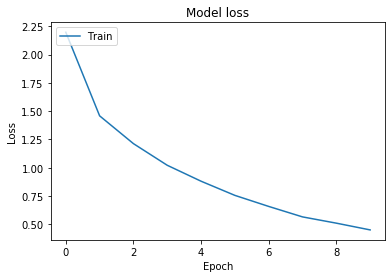

In [0]:

# Plot training & validation loss values
plt.plot(history_callback.history['loss'])
#plt.plot(history_callback.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

